# Crop Recommendation (Classification)

Predict crop `label` from soil/environment features in `crop_recommendation.csv`.


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context('notebook')


In [4]:
# Load the dataset
path_reco = os.path.join('..', 'datasets', 'crop_recommendation.csv')
reco = pd.read_csv(path_reco)

print("Data shape:", reco.shape)
reco.head()

Data shape: (2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
X = reco.drop(columns=['label'])
y = reco['label']
num_cols = X.columns.tolist()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
preproc = ColumnTransformer([
    ('num', StandardScaler(), num_cols)
])

In [8]:
models = {
    'LogReg': LogisticRegression(max_iter=200),
    'RandomForest': RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
}

best_name, best_pipe, best_acc = None, None, -1
for name, mdl in models.items():
    pipe = Pipeline([('prep', preproc), ('model', mdl)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"\n{name} Report:\n", classification_report(y_test, y_pred))
    acc = accuracy_score(y_test, y_pred)
    if acc > best_acc:
        best_name, best_pipe, best_acc = name, pipe, acc

print('Best model:', best_name, 'Accuracy:', best_acc)


LogReg Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.98        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.83      1.00      0.91        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.85      0.89        20
       maize       1.00      0.95      0.97        20
       mango       0.95      1.00      0.98        20
   mothbeans       0.90      0.90      0.90        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      0.95      0.97        20
      papa

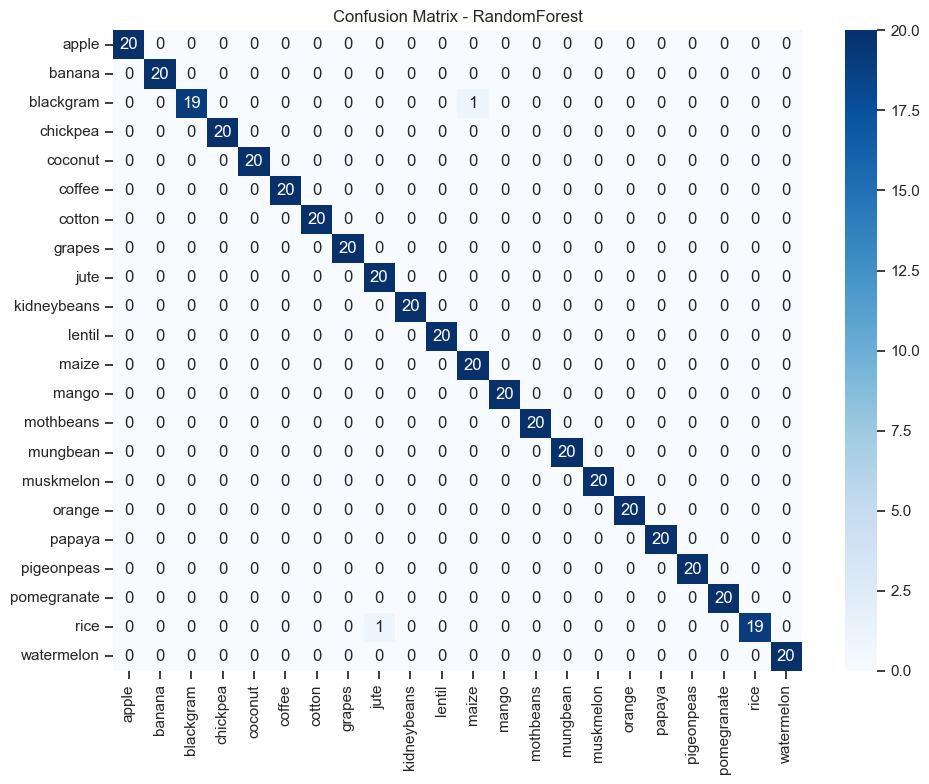

In [9]:
cm = confusion_matrix(y_test, best_pipe.predict(X_test), labels=sorted(y.unique()))
plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()), annot=True, fmt='d')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title(f'Confusion Matrix - {best_name}')
plt.tight_layout()
plt.show()

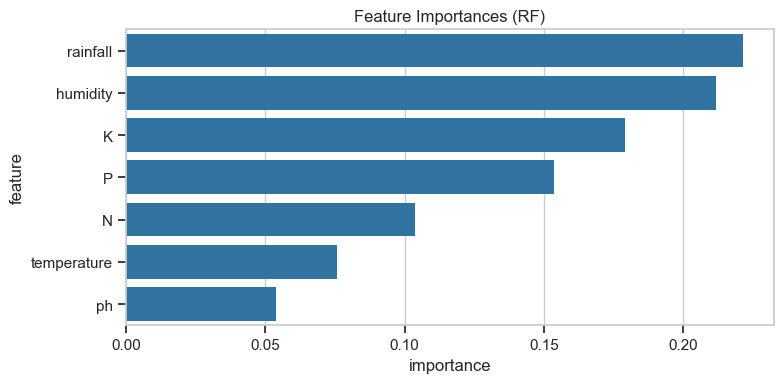

In [10]:
if best_name == 'RandomForest':
    rf = best_pipe.named_steps['model']
    imp = pd.DataFrame({'feature': num_cols, 'importance': rf.feature_importances_}).sort_values('importance', ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(data=imp, x='importance', y='feature')
    plt.title('Feature Importances (RF)')
    plt.tight_layout()
    plt.show()